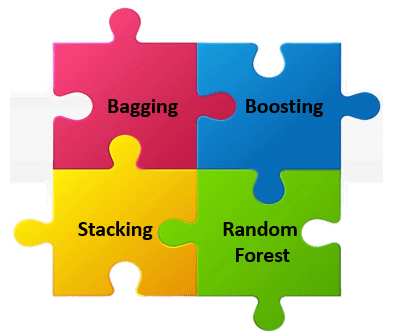

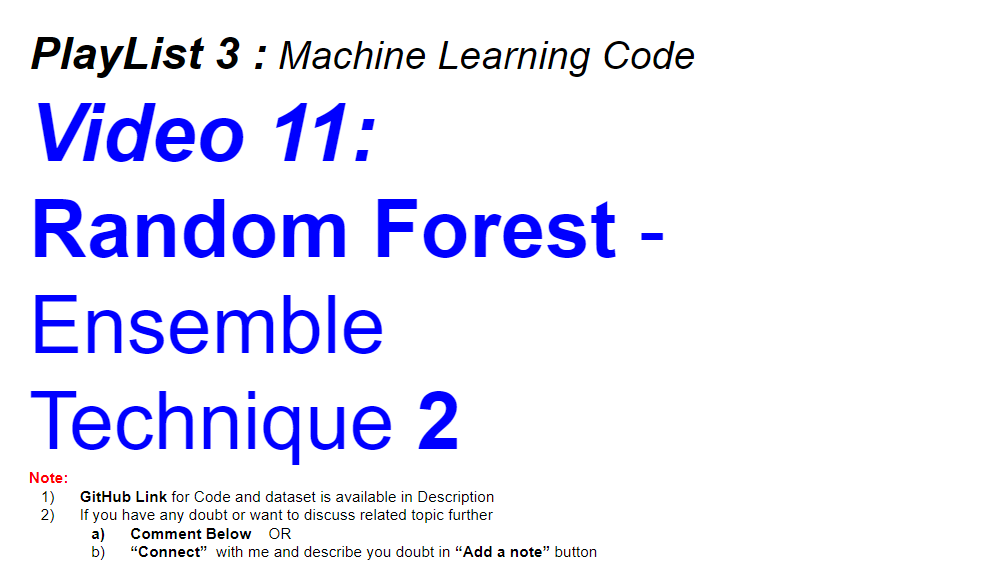

#### Working of a Random Forest Model

<img src="random_forest.PNG">

From the given dataset different samples are created by bootstrapping and these samples are used to train different decision trees. Once the training is complete, prediction is made using all the different models.


#### Predicting Outcome

<img src="random_forest2.PNG">

Random forest makes the prediction by taking the mode of all the predictions made by all the models, since this is the case of classification. This process is also known as “Majority voting”.
We can also use prediction probability to make the final prediction. We can use the predict_proba method, which will predict a probability from 0 to 1 that a given class is the right one for a row. For a problem with output being only 0 and 1, we'll get a matrix with as many rows as there is in the data and 2 columns. predict_proba will return something like this:

<img src="8.PNG">

Each row corresponds to a prediction. The first column is the probability that the prediction is a 0, the second column is the probability that the prediction is a 1. Each row adds up to 1.

If we just take the second column, we get the average value that the classifier would predict for that row. If there's a .9 probability that the correct classification is 1, we can use the .9 as the value the classifier is predicting. This will give us a continuous output in a single vector instead of just 0 or 1.
We can then add all of the vectors we get through this method together and divide by the number of vectors to get the mean prediction by all the members of the ensemble. We can then round off to get 0 or 1 predictions.
Similarly, in case of regression Random forest makes the prediction by taking the mean of all the predictions made by different models. 

#### Advantages and Disadvantages of Random Forest:

1)	It can be used for both regression and classification problems.

2)	Since base model is a tree, handling of missing values is easy.

3)	It gives very accurate result with very low variance.

4)	Results of a random forest are very hard to interpret in comparison with decision trees.

5)	High computational time than other respective models.


Random Forest should be used where accuracy is up utmost priority and interpretability is not very important. Also, computational time is less expensive than the desired outcome.

In [2]:
# Reading "Red wine quality" data from kaggle
import pandas as pd
df = pd.read_csv('winequality-red.csv')
# Download Weblink : https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# splitting the data
X = df.drop(columns='quality')
y = df['quality']

# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=355)

# defining and training the model
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(min_samples_split=2)
clf1.fit(X_train,y_train)

# Calculating the accuracy
clf1.score(X_test,y_test)

0.6333333333333333

In [4]:
# 2nd Model of DecisionTreeClassifier with different parameters

clf2 = DecisionTreeClassifier(criterion= 'entropy',
                            max_depth=24,
                            min_samples_leaf=1)
clf2.fit(X_train,y_train)

# Calculating the accuracy
clf2.score(X_test,y_test)

0.6166666666666667

In [5]:
# Implementing "RandomForestClassifier" model
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=6) # by default, n_estimators=100
rand_clf.fit(X_train,y_train)  # Training the model
rand_clf.score(X_test,y_test)  # Calculating the accuracy

0.6708333333333333

In [6]:
# accuracy of
     # rand_clf > clf1 , clf2

In [7]:
# tweaking the number of estimators in "RandomForestClassifier" model
from sklearn.ensemble import RandomForestClassifier
rand_clf2 = RandomForestClassifier(n_estimators=2,
                                  random_state=6)
rand_clf2.fit(X_train,y_train)
rand_clf2.score(X_test,y_test) 

# observation ~ Accuracy took the plunge (from 67% to 56%)

0.5604166666666667

In [8]:
# tweaking the number of estimators in "RandomForestClassifier" model
from sklearn.ensemble import RandomForestClassifier
rand_clf3 = RandomForestClassifier(n_estimators=40,
                                  random_state=6)
rand_clf3.fit(X_train,y_train)
rand_clf3.score(X_test,y_test) 

# observation ~
        # accuracy is almost close to the accuracy of (by default~100) case

0.6645833333333333

# HyperParameter Tuning
        with the help of GridSearch

In [9]:
# creating dictionary
# we are tuning three hyperparameters right now,
    # we are passing the different values for each parameters
grid_param = {
    "n_estimators" : [1,10,2], # defining 'n_estimators'
    # "[1,300,1]" will take eternity to complete the training / compiling
    'criterion' : ['gini','entropy'],  # defining range for 'criterion'
    'max_depth' : range(2,20,1), # defining range for 'max_depth'
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'max_features' : ['auto','log2']  
}

In [10]:
# Applying "GridSearchCV" model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rand_clf,
                           param_grid=grid_param,
                           cv=5, # cv ~ Cross Validation
                           n_jobs=-1, #  ``-1`` means using all processors.
                           verbose=3)

grid_search.fit(X_train,y_train) # training GridSearchCV model
# take more time fit / train the model

Fitting 5 folds for each of 15552 candidates, totalling 77760 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [1, 10, 2]},
             verbose=3)

In [11]:
grid_search.score(X_test,y_test) # calculating Accuracy score

0.6229166666666667

In [12]:
grid_search.best_params_

# found the "best paraameters" through HyperParameter Tuning implemented through GridSearchCV

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [13]:
# Lets pass the above parameters through "RandomForestClassifier"

rand_clf = RandomForestClassifier(criterion='entropy',
                                  max_depth = 12,
                                  max_features = 'auto',
                                  min_samples_leaf = 2,
                                  min_samples_split = 5,
                                  n_estimators = 10,
                                  random_state=6
                                 )

In [14]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=10, random_state=6)

In [15]:
rand_clf.score(X_test,y_test)

0.6229166666666667

In [16]:
# observation: Accuracy slightly increased

Our accuracy has improved and score is better than the last grid search. So, we can say that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

You are welcome to try tweaking the parameters more and try an improve the accuracy more.

In [17]:
# lets save the model

import pickle

with open('C:\Users\Kapil Wanaskar\Downloads\Ineuron Resources\Lectures - ML\Code and Datasets'+
          '/modelForPrediction.sav',
          'wb') as f:
    pickle.dump(rand_clf,f)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_5200/235702236.py, line 5)